In [3]:
import os
import numpy
import SimpleITK as sitk
import matplotlib.pyplot as plt
%pylab inline

def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()
    
path = 'data/interrsect_005.nii.gz'
image_1_path = '/home/jbregazzi/Documents/josephine/GitHub/Brain-Scan-Example-Data/Interrsect/mini-dataset/INTERRSeCT01-019_FollowUp.nii.gz'

reader = sitk.ImageFileReader()
reader.SetImageIO("NiftiImageIO")
reader.SetFileName(image_1_path)
image = reader.Execute()

idxSlice = 24

# int labels to assign to the segmented white and gray matter.
labelWhiteMatter = 1
labelGrayMatter = 2



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /Users/runner/work/1/sitk-build/ITK/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:1039:
ITK ERROR: NiftiImageIO(0x7fecde742960): /home/jbregazzi/Documents/josephine/GitHub/Brain-Scan-Example-Data/Interrsect/mini-dataset/INTERRSeCT01-019_FollowUp.nii.gz is not recognized as a NIFTI file

In [ ]:
image = image[:,:,idxSlice]

sitk_show(image)

In [ ]:
# Define the radius of the structuring element for erosion
radius = (3,3)

# Perform binary erosion
eroded_image = SimpleITK.BinaryErode(image, radius)

for i in range(100):
    eroded_image = SimpleITK.BinaryErode(eroded_image, radius)

sitk_show(eroded_image)

In [4]:
binary_image = sitk.BinaryThreshold(image, lowerThreshold=260, upperThreshold=340, insideValue=1, outsideValue=0)
sitk_show(binary_image)

NameError: name 'image' is not defined

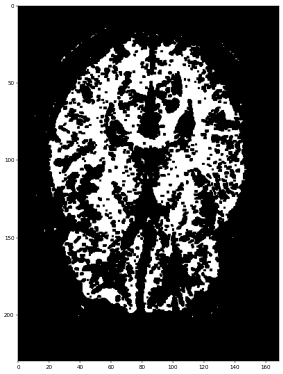

In [36]:
# Define the radius of the structuring element for erosion
radius = (1,1)

# Perform binary erosion
eroded_image = SimpleITK.BinaryErode(binary_image, radius)

sitk_show(eroded_image)

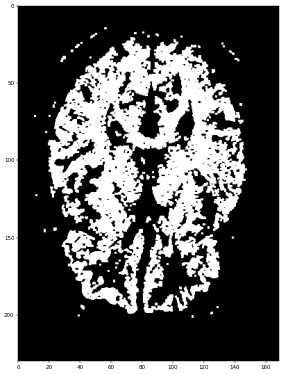

In [38]:
# Define the radius of the structuring element for erosion
radius = (1,1)

# Perform binary erosion
dilated_image = SimpleITK.BinaryDilate(eroded_image, radius)

sitk_show(dilated_image)

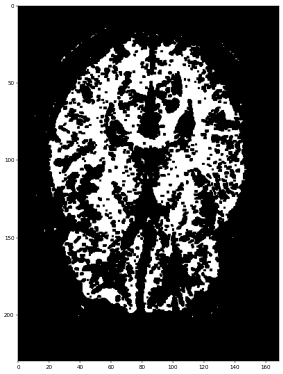

In [39]:
# Define the radius of the structuring element for erosion
radius = (1,1)

# Perform binary erosion
eroded_image2 = SimpleITK.BinaryErode(dilated_image, radius)

sitk_show(eroded_image2)

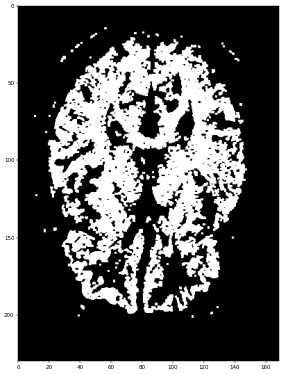

In [40]:
# Define the radius of the structuring element for erosion
radius = (1,1)

# Perform binary erosion
dilated_image2 = SimpleITK.BinaryDilate(eroded_image2, radius)

sitk_show(dilated_image2)